In [34]:
# Official
import pandas
import copy
import numpy
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Custom
from utils import modify_space_data

In [35]:
# Load training data
train_data_path: "str" = "~/Desktop/spaceship_titanic/data/train.csv"
train_data: "DataFrame" = pandas.read_csv(train_data_path)

# Load test data
test_data_path: "str" = "~/Desktop/spaceship_titanic/data/test.csv"
test_data: "DataFrame" = pandas.read_csv(test_data_path)

## Notes
- PassengerId: Must be split into group number and group member
- HomePlanet: Is class variable with 3 classes
- CryoSleep: Is boolean variable
- Cabin: Must be split into three class variables
- Age: A numeric variable
- VIP: A boolean variable
- RoomService: Numeric, predominantly 0
- FoodCourt: Numeric, predominantly 0
- ShoppingMall: Numeric, predominantly 0
- Spa: Numeric, predominantly 0
- VRDeck: Numeric, predominantly 0
- Name: Purely ID based (Can be used for identifying families)
- Transported: Boolean variable

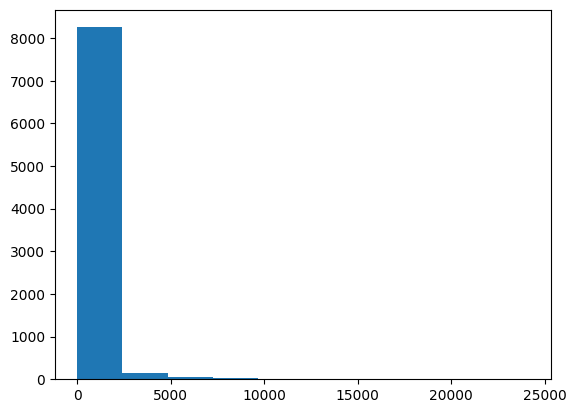

True     4378
False    4315
Name: Transported, dtype: int64

In [36]:
# Code for analysing features

# For showing number of unique entries
train_data.nunique()

# For showing histograms of different columns
plt.hist(train_data["VRDeck"])
plt.show()

# For showing the counts of unique values in a column
train_data["Transported"].value_counts().sort_values(ascending=False)

In [42]:
subject: "str" = "Transported"

edit_data: "DataFrame" = modify_space_data(train_data)

labels: "DataFrame" = copy.deepcopy(edit_data[subject])
features: "DataFrame" = copy.deepcopy(edit_data.drop([subject], axis=1))

validation_size: "float" = 0.2
random_state: "int" = 2

train_features, val_features, train_labels, val_labels = train_test_split(features,labels,test_size=validation_size,random_state=random_state)
test_features: "DataFrame" = modify_space_data(test_data)

In [47]:
logistic_model: "LogisticRegression" = LogisticRegression(penalty="l2", max_iter=10000, random_state=random_state)
fitted_model = logistic_model.fit(train_features, train_labels)
logistic_accuracy: "float" = fitted_model.score(val_features, val_labels)

print(logistic_accuracy)

fitted_model.predict(test_features)

0.80448533640023


array([ True, False,  True, ...,  True,  True,  True])

In [17]:
from torch.utils.data import Dataset, DataLoader
import torch

class SpaceData(Dataset):

    def __init__(self, X, y):

        X = copy.deepcopy(X).to_numpy(dtype=float)
        self.X = torch.tensor(X, dtype=torch.float)

        y = copy.deepcopy(y).to_numpy(dtype=float)
        self.y = torch.reshape(torch.tensor(y, dtype=torch.float), (-1,1))

    def __len__(self):

        return len(self.X)

    def __getitem__(self, index):
        return self.X[index, :], self.y[index]

space_train_dataset = SpaceData(X=X_train,y=y_train)
space_val_dataset = SpaceData(X=X_val,y=y_val)

space_train_dataloader = DataLoader(dataset=space_train_dataset, batch_size=len(space_train_dataset), shuffle=True)
space_val_dataloader = DataLoader(dataset=space_val_dataset, batch_size=len(space_val_dataset), shuffle=True)

Now's the time to get out the big guns (PyTorch)

In [ ]:
import torch

class CustomModel(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Linear(37, 75),
            torch.nn.ReLU(),
            torch.nn.Linear(75, 120),
            torch.nn.ReLU(),
            torch.nn.Linear(120, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, input):
        return self.model(input=input)

custom_model = CustomModel()

loss_model = torch.nn.BCELoss()

optimiser = torch.optim.SGD(custom_model.parameters(), lr=10**(-4))

In [21]:
def loss_calulation(dataloader, custom_model, loss_model, no_grad=False):

    for (sample, label) in dataloader:

        if not no_grad:
            prediction = custom_model(sample)
            return loss_model(prediction, label)
        else:
            with torch.no_grad():
                prediction = custom_model(sample)
                return loss_model(prediction, label)

def accuracy_calulation(dataloader, custom_model):

    for (sample, label) in dataloader:
        with torch.no_grad():
            prediction = custom_model(sample)
            return (prediction.round() == label).sum() / len(sample)

def optimise(optimiser, loss):
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()


size = 2000
for current in range(size):

    train_loss = loss_calulation(
        dataloader=space_train_dataloader,
        custom_model=custom_model,
        loss_model=loss_model
    )

    optimise(
        optimiser=optimiser,
        loss=train_loss
    )

    val_loss = loss_calulation(
        dataloader=space_val_dataloader,
        custom_model=custom_model,
        loss_model=loss_model,
        no_grad=True
    )

    val_acc = accuracy_calulation(
        dataloader=space_val_dataloader,
        custom_model=custom_model
    )

    if current % 10 == 0:
        print(f"loss: {val_loss.item():>7f}, accuracy: {val_acc.item():>7f}  [{current+1:>5d}/{size:>5d}]")

loss: 4.180818, accuracy: 0.696377  [    1/ 2000]
loss: 1.063512, accuracy: 0.764807  [   11/ 2000]
loss: 0.997216, accuracy: 0.766532  [   21/ 2000]
loss: 0.955438, accuracy: 0.767108  [   31/ 2000]
loss: 0.919985, accuracy: 0.766532  [   41/ 2000]
loss: 0.889121, accuracy: 0.764807  [   51/ 2000]
loss: 0.859227, accuracy: 0.764807  [   61/ 2000]
loss: 0.831626, accuracy: 0.763657  [   71/ 2000]
loss: 0.805587, accuracy: 0.761932  [   81/ 2000]
loss: 0.781367, accuracy: 0.767108  [   91/ 2000]
loss: 0.759249, accuracy: 0.765957  [  101/ 2000]
loss: 0.739900, accuracy: 0.767683  [  111/ 2000]
loss: 0.722851, accuracy: 0.767683  [  121/ 2000]
loss: 0.707756, accuracy: 0.767108  [  131/ 2000]
loss: 0.694266, accuracy: 0.766532  [  141/ 2000]
loss: 0.682261, accuracy: 0.767108  [  151/ 2000]
loss: 0.671557, accuracy: 0.767683  [  161/ 2000]
loss: 0.662089, accuracy: 0.771133  [  171/ 2000]
loss: 0.653978, accuracy: 0.772283  [  181/ 2000]
loss: 0.647109, accuracy: 0.771708  [  191/ 2000]


KeyboardInterrupt: 